<a href="https://colab.research.google.com/github/brunocu/DataScience/blob/master/MLintro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learning

> Al trabajar en **Jupyter** usar `%matplotlib notebook` para visualizar gráficas interactivas o `%matplot inline`. En Python normal `plt.show`

> Quieres ver este archivo en [nbviewer](https://nbviewer.jupyter.org/github/brunocu/DataScience/blob/master/MLintro.ipynb)?

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

## Numpy

<img src="https://proxy.duckduckgo.com/iu/?u=https%3A%2F%2Fnumfocus.org%2Fwp-content%2Fuploads%2F2016%2F07%2Fnumpy-logo-300.png&f=1" alt="Numpy" height="80">


```python
import numpy as np
```

Principal función de Numpy: Introduce arrays (matrices)

**Arrays**: Contenedor eficiente en memoria que proporciona operaciones numéricas rápidas.

Ejemplos de uso de matrices en Machine Learning:

- Valores de un experimento/simulación en pasos de tiempo discretos.
- Señal registrada por un dispositivo de medición, por ejemplo, una onda sonora.
- Píxeles de una imagen, nivel de gris o color.
- Datos 3D medidos en diferentes posiciones XYZ.

### TL;DR

- Cómo crear arrays: `array`, `arange`, `ones`, `zeros`.
- Conocer la forma del array con `array.shape`, ajustar la forma del array mediante `reshape` o aplanarlo con `ravel`.
- Modificar los valores de un array.

### Creación de Arrays

#### Espaciados uniformemente

In [2]:
a = np.arange(10) # 0 .. n-1  (!)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
b = np.arange(1, 9, 2) # start, end (exclusive), step
b

array([1, 3, 5, 7])

#### Por cantidad de puntos

In [4]:
c = np.linspace(0, 1, 6)   # start, end, num-points
c

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

#### Matrices comunes

In [5]:
d = np.ones((3, 3))    # Matriz de (n, m) tamaño llena de 1
d

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [6]:
e = np.zeros((2, 2))    # Matriz de (n, m) tamaño llena de 0 (Matriz cero)
e

array([[0., 0.],
       [0., 0.]])

In [7]:
f = np.eye(3)    # Matriz identidad
f

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [8]:
g = np.diag(np.array([1, 2, 3, 4]))    # Array diagonal que toma otra array como input
g

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [9]:
h = np.random.rand(4)    # Matriz 1D con 4 valores al azar [0,1]
h

array([0.65841171, 0.15725997, 0.44447436, 0.82566409])

### Ejemplo: 1D Array

In [10]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

In [11]:
a.ndim

1

In [12]:
a.shape

(4,)

In [13]:
len(a)

4

### Ejemplo: 2D, 3D Array

In [14]:
b = np.array([[0, 1, 2], [3, 4, 5]])    # 2 x 3 array (array de arrays)
b

array([[0, 1, 2],
       [3, 4, 5]])

In [15]:
b.ndim

2

In [16]:
b.shape

(2, 3)

In [17]:

len(b)    # regresa el tamaño de la "primera" dimensión

2

### Operaciones con matrices

> Todas las operaciones aritméticas con escalares se maneja por elementos.

In [0]:
a = np.array([1, 2, 3, 4])

In [19]:
a + 1    # Suma de una matriz y un escalar

array([2, 3, 4, 5])

In [20]:
a * 5    # Producto por un escalar

array([ 5, 10, 15, 20])

In [21]:
a**2    # Matriz elevado a un escalar

array([ 1,  4,  9, 16])

In [22]:
2**a    # Escalar elevado a una matriz

array([ 2,  4,  8, 16])

**Multiplicación de arrays NO es lo mismo que multiplicación de matrices**

En Numpy, al multiplicar `array * array` se limita a multiplicar los valores que se encuentran en la misma posición.

In [23]:
b = np.ones((3,3))
b

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [24]:
b * b

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [25]:
b.dot(b)    # Multiplicación de Matrices

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])

> `numpy.linalg` implementa álgebra lineal básica, como la resolución de sistemas lineales, descomposición de valores singulares, etc.

### Manipulación de forma

In [26]:
# Flattening

a = np.array([[1, 2, 3], [4, 5, 6]])
a.ravel()

array([1, 2, 3, 4, 5, 6])

In [27]:
# Reshaping (inverso de Flattening)

b = a.ravel()
b.reshape((2,3))    # Toma como input un tuple de las nuevas dimensiones

array([[1, 2, 3],
       [4, 5, 6]])

In [28]:
# Resizing
# No se puede utilizar si el array está siendo referenciado

a = np.arange(4)
a.resize((8,))
a

array([0, 1, 2, 3, 0, 0, 0, 0])

### Ordenamiento de Datos

In [29]:
# En un eje

a = np.array([[4, 3, 5],
              [1, 2, 1]])
b = np.sort(a, axis=1)
b

array([[3, 4, 5],
       [1, 1, 2]])

### Broadcasting

En álgebra lineal tradicional no pueden hacerse operaciones aritméticas con matrices de diferentes dimensiones.

NumPy sí puede hacerlo transformando automáticamente los arrays para que todos tengan el mismo tamaño, este proceso es llamado: **broadcasting**.

![broadcasting](http://scipy-lectures.org/_images/numpy_broadcasting.png)

Para una discusión más a profundidad de este proceso puedes visitar la lección de [broadcasting](http://scipy-lectures.org/advanced/advanced_numpy/index.html#broadcasting-advanced) de las **SciPy Lectures**.

### Array Visualization (with matplotlib)

#### 1D Plotting

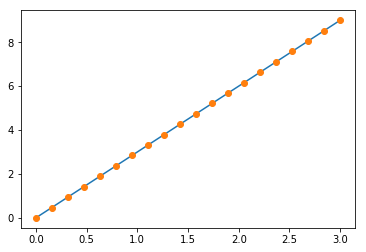

In [30]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)       # line plot    

plt.plot(x, y, 'o')  # dot plot

#### 2D Plot

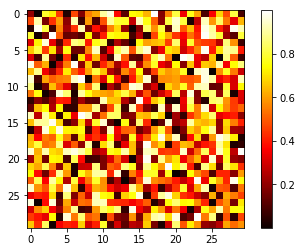

In [31]:
image = np.random.rand(30, 30)
plt.imshow(image, cmap=plt.cm.hot)    

plt.colorbar()

### Ejemplo: Difusión mediante un algoritmo de desplazamiento aleatorio

Consideremos un simple proceso de salto aleatorio en 1D: en cada paso un "caminante" salta a la derecha o a la izquierda con igual probabilidad.

Estamos interesados en encontrar la distancia típica desde el origen de un caminante al azar después de `t` saltos a la izquierda o a la derecha. Vamos a simular a muchos "caminantes" para encontrar esta ley, usando computación en array: vamos a crear un array 2D con las "historias" (cada caminante tiene una historia) en una dirección, y el tiempo en la otra:

In [32]:
n_stories = 1000 # número de caminantes
t_max = 200      # tiempo en el que seguimos al caminante

t = np.arange(t_max)
steps = 2 * np.random.randint(0, 1 + 1, (n_stories, t_max)) - 1

np.random.randint(0,1+1, (n_stories, t_max))

np.unique(steps)    # Regresa todos los valores únicos de nuestro array. Verificar que todos sean -1 ó 1

array([-1,  1])

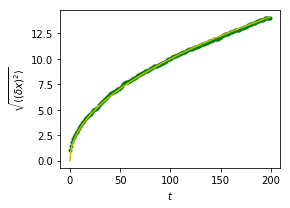

In [33]:
# Construimos las caminatas sumando pasos a lo largo del tiempo:
positions = np.cumsum(steps, axis=1)   # axis = 1: tiempo
sq_distance = positions**2

# Obtenemos la media en el eje de las historias:
mean_sq_distance = np.mean(sq_distance, axis=0)

# Y graficamos los resultados
plt.figure(figsize=(4, 3)) 

plt.plot(t, np.sqrt(mean_sq_distance), 'g.', t, np.sqrt(t), 'y-') 

plt.xlabel(r"$t$") 

plt.ylabel(r"$\sqrt{\langle (\delta x)^2 \rangle}$") 

plt.tight_layout()

## Matplotlib

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Matplotlib_icon.svg/200px-Matplotlib_icon.svg.png" alt="Matplotlib" height="100">

```python
import matplotlib.pyplot as plt
```

Paquete Python para gráficos 2D. Proporciona una forma rápida y de alta calidad de visualizar los datos de Python.

Jupyter notebook y IPython tienen integración interactiva para Matplotlib.

> En IPython:

```python
%matplotlib
```

> En Jupyter:

```python
%matplotlib inline
```

### Ejemplo: Graficar seno y coseno

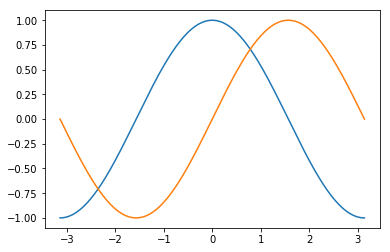

In [36]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

plt.plot(X, C)
plt.plot(X, S)

Matplotlib tiene un alto grado de personalización. Puedes leer la [documentación](https://matplotlib.org/users/customizing.html) o usar esta útil [cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf) (de data camp).

Entre las cosas que puedes personalizar se encuentran:

- Cambiar color y grosor de líneas.
- Establecer límites para los ejes
- Establecer marcas de eje
- Establecer etiquetas de marca
- Mover el origen
- Añadir leyendas
- Destacar puntos

Entre otros

## SciPy

<img src="https://www.fullstackpython.com/img/logos/scipy.png" alt="SciPy" height="100">